# Signal Quality Analysis

1. Peak detection to find the maxima and minima of each PPG wave pulse
2. Identification and separation of individual pulses
3. Fourier transform and power in needed frequencies

In [15]:
import copy
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy.signal import argrelextrema

In [16]:
flat_asp = pd.read_csv("myfile_new.csv")

In [17]:
flat_asp = flat_asp.drop(flat_asp.columns[0], axis=1)

In [18]:
# [flat_asp.max() for _ in range(20)]

flat_asp.max()["ASP_col"]

np.float64(235.0)

(0.0, 245.6)

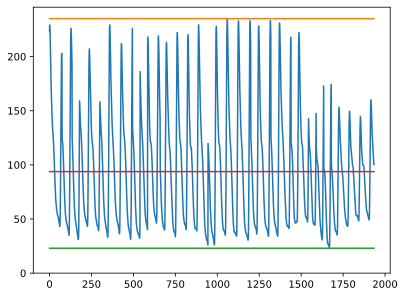

In [19]:
x = flat_asp.index

plt.plot(
    x,
    flat_asp,
    x,
    [flat_asp.max()["ASP_col"] for _ in x],
    x,
    [flat_asp.min()["ASP_col"] for _ in x],
    x,
    [flat_asp.mean()["ASP_col"] for _ in x],
)
plt.ylim(
    0,
)

In [20]:
def find_peaks_global(df, start, end):
    peaks_minima = []
    peaks_maxima = []

    for i in range(start, (end - 1)):
        if df.iloc[i + 1, 0] > df.iloc[i, 0] and df.iloc[i + 1, 0] > df.iloc[i + 2, 0]:
            if (
                df.iloc[i + 1, 0] > df.iloc[i + 3, 0]
                and df.iloc[i + 1, 0] > df.iloc[i + 4, 0]
            ):
                peaks_maxima.append((i + 1, df.iloc[i + 1, 0]))

        if df.iloc[i + 1, 0] < df.iloc[i, 0] and df.iloc[i + 1, 0] < df.iloc[i + 2, 0]:
            if (
                df.iloc[i + 1, 0] < df.iloc[i + 3, 0]
                and df.iloc[i + 1, 0] < df.iloc[i + 4, 0]
            ):
                peaks_minima.append((i + 1, df.iloc[i + 1, 0]))

    # sorting the maximas and minimas to select only one
    sorted_minima = sorted(peaks_minima, key=lambda min: min[1])
    refined_minima = sorted_minima[0]
    sorted_maxima = sorted(peaks_maxima, key=lambda max: max[1], reverse=True)
    refined_maxima = sorted_maxima[0]

    peaks = {"minima": refined_minima, "maxima": refined_maxima}

    return peaks


def find_peaks_all(df, start, end):
    peaks_minima = []
    peaks_maxima = []

    # check whether i or i+1 is the actual extrema
    for i in range(start, (end - 1), 1):
        if df.iloc[i + 1, 0] > df.iloc[i, 0] and df.iloc[i + 1, 0] > df.iloc[i + 2, 0]:
            if df.iloc[i + 1, 0] > np.mean(df.iloc[i - 5 : i + 1, 0]) and df.iloc[
                i + 1, 0
            ] > np.mean(df.iloc[i + 1 : i + 15, 0]):
                peaks_maxima.append((i + 1, df.iloc[i + 1, 0]))

        if df.iloc[i + 1, 0] < df.iloc[i, 0] and df.iloc[i + 1, 0] < df.iloc[i + 2, 0]:
            if df.iloc[i + 1, 0] < np.mean(df.iloc[i - 5 : i + 1, 0]) and df.iloc[
                i + 1, 0
            ] < np.mean(df.iloc[i + 1 : i + 5, 0]):
                if df.iloc[i + 1, 0] < np.mean(df.iloc[i - 2 : i + 1, 0]) and df.iloc[
                    i + 1, 0
                ] < np.mean(df.iloc[i + 1 : i + 3, 0]):
                    peaks_minima.append((i + 1, df.iloc[i + 1, 0]))

    # sorting the maximas and minimas to select only one
    peaks = {"minima": peaks_minima, "maxima": peaks_maxima}

    return peaks


def sasha_find_peaks(df):
    df["min"] = df.iloc[:, 0].rolling(window=3, center=True).min()
    min_indices = argrelextrema(df["ASP_col"].values, np.less, order=10)[0]
    return min_indices

In [21]:
all_peaks = find_peaks_all(df=flat_asp, start=5, end=flat_asp.shape[0] - 1)
sasha_min = sasha_find_peaks(copy.deepcopy(flat_asp))

In [22]:
all_peaks_indices = []
all_peaks_values = []
for elem in all_peaks["minima"]:
    a, b = elem
    all_peaks_indices.append(a)
    all_peaks_values.append(b)

# all_peaks_indices[0:10]

all_peaks_minima_df = pd.DataFrame(
    {"index": all_peaks_indices, "value": all_peaks_values}
)

all_peaks_indices = []
all_peaks_values = []
for elem in all_peaks["maxima"]:
    a, b = elem
    all_peaks_indices.append(a)
    all_peaks_values.append(b)

all_peaks_maxima_df = pd.DataFrame(
    {"index": all_peaks_indices, "value": all_peaks_values}
)

In [23]:
print(all_peaks_minima_df.shape)
print(all_peaks_maxima_df.shape)
print(sasha_min.shape)

(44, 2)
(33, 2)
(33,)


In [24]:
sasha_min

array([  61,  116,  171,  225,  292,  346,  416,  483,  536,  584,  637,
        685,  750,  814,  877,  944,  982, 1047, 1115, 1183, 1235, 1304,
       1359, 1426, 1465, 1537, 1581, 1625, 1668, 1714, 1775, 1842, 1904])

In [25]:
from IPython import display

%config InlineBackend.figure_formats = ['svg']

(0.0, 245.6)

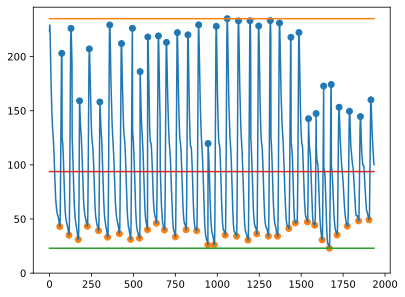

In [26]:
x = flat_asp.index
plt.plot(
    x,
    flat_asp,
    x,
    [flat_asp.max()["ASP_col"] for _ in x],
    x,
    [flat_asp.min()["ASP_col"] for _ in x],
    x,
    [flat_asp.mean()["ASP_col"] for _ in x],
)
# plt.scatter(all_peaks_minima_df["index"], all_peaks_minima_df["value"])
plt.scatter(all_peaks_maxima_df["index"], all_peaks_maxima_df["value"])
plt.scatter(sasha_min, flat_asp.iloc[sasha_min])
# plt.xlim(750,1000)
plt.ylim(
    0,
)

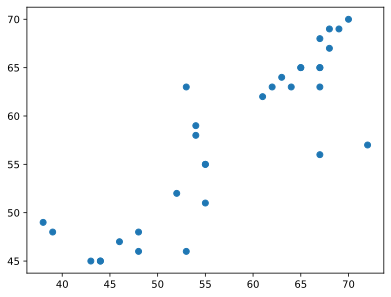

In [27]:
# Difference between minima and maxima
x = np.arange(1, sasha_min.shape[0])
plt.scatter(np.diff(sasha_min), np.diff(all_peaks_maxima_df["index"]))

In [217]:
print(np.mean(np.diff(sasha_min)))
print(np.mean(np.diff(all_peaks_maxima_df["index"])))

57.59375
57.59375


In [220]:
sp.stats.pearsonr(np.diff(sasha_min), np.diff(all_peaks_maxima_df["index"]))[0]

np.float64(0.8628762467340682)

In [229]:
interbeat_minima = np.diff(sasha_min)
interbeat_maxima = np.diff(all_peaks_maxima_df["index"])
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(
    interbeat_minima, interbeat_maxima
)

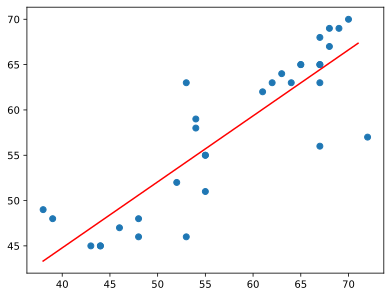

In [237]:
x = np.arange(interbeat_minima.min(), interbeat_minima.max())
plt.scatter(interbeat_minima, interbeat_maxima)
y = slope * x + intercept
plt.plot(x, y, "r")

In [261]:
all_peaks_df = pd.DataFrame(
    {
        "minima": flat_asp.iloc[sasha_min].reset_index(drop=True)["ASP_col"],
        "maxima": flat_asp.iloc[all_peaks_maxima_df["index"]].reset_index(drop=True)[
            "ASP_col"
        ],
    }
)

In [264]:
all_peaks_df["Max-Min"] = all_peaks_df["maxima"] - all_peaks_df["minima"]

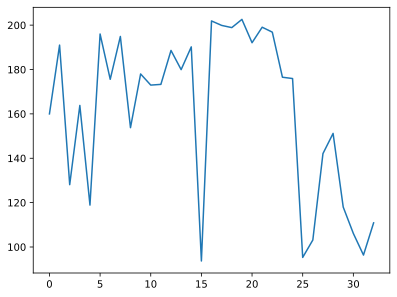

In [267]:
plt.plot(all_peaks_df["Max-Min"])

In [269]:
all_peaks_df["Max-Min"].mean()

np.float64(161.3839393939394)

In [271]:
np.std(interbeat_minima)
np.cov(interbeat_maxima, interbeat_minima)

array([[ 71.47479839,  73.08770161],
       [ 73.08770161, 100.37802419]])

## FFT

In [78]:
ts_asp = flat_asp.ASP_col.to_numpy()

temp_fft = sp.fftpack.fft(ts_asp)

In [79]:
temp_psd = np.abs(temp_fft) ** 2

In [80]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1.0 / 75)

In [81]:
i = fftfreq > 0

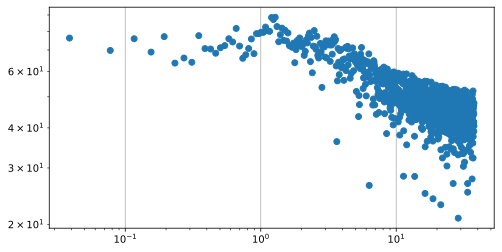

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.loglog(fftfreq[i], 10 * np.log10(temp_psd[i]), "o")
ax.grid("on")
# ax.set_xlim(0,5)

/home/anton/Dozee/tmp/ppg-analysis/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/anton/Dozee/tmp/ppg-analysis/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


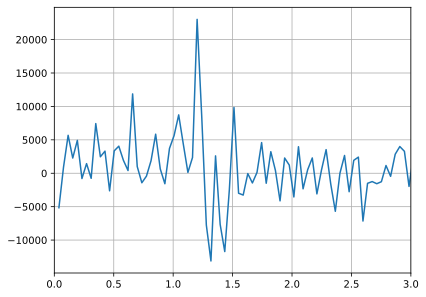

In [83]:
plt.plot(fftfreq[i], temp_fft[i])
plt.xlim(0, 3)
plt.grid("on")

/home/anton/Dozee/tmp/ppg-analysis/.venv/lib/python3.13/site-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


(-1.0, 5.0)

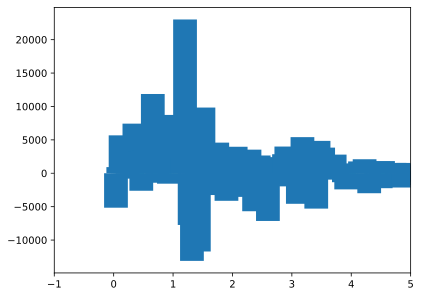

In [84]:
plt.bar(fftfreq[i], temp_fft[i], width=0.4)
plt.xlim(-1, 5)

### FFT welch

In [96]:
fs = 1 / 75
# N = flat_asp.shape[0]
f, Pxx_den = sp.signal.welch(ts_asp, fs, nperseg=4096)

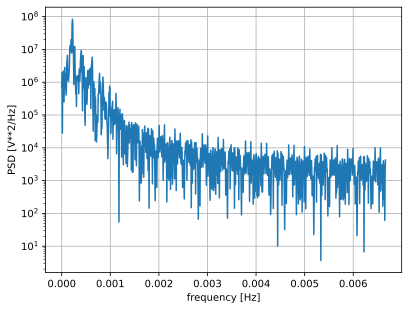

In [97]:
plt.semilogy(f, Pxx_den)
# plt.ylim([0.5e-3, 1])
plt.xlabel("frequency [Hz]")
plt.grid("on")
plt.ylabel("PSD [V**2/Hz]")
plt.show()